# Physicsl Models of Living Systems
## Homework 1
### Maryam Feizi 2091504

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Linear stability analysis of the deterministic logistic equation
The equation is:
$$\frac{dN}{dt} = \mu N(1- \frac{N}{k})$$
For the equilibrium points:
$$\frac{dN}{dt}=0$$
$$N^{*}= 0 , N^{*}=k$$
We take: $\delta N = N - N^{*}$

We can eproximate the equation:
$$\frac{dN}{dt}= f(N^{*})+ J\delta N$$
$$\frac{dN}{dt} = f(N^{*}=0)$$
$$\frac{dN}{dt} \approx J\delta N$$
Then we can analyse two point for stability:
$$f(N)= \mu N(1- \frac{N}{k})$$
$$f'(N) = \mu - \frac{2\mu N}{k}$$
$$f'(0) = \mu > 0 \rightarrow unstable point$$ 
$$f'(k)= -\mu < 0 \rightarrow stable point$$

## Quasi stationary approximation for CRM with abiotic resources.

The consumer resourses model with 1 species and 1 abiotic resource is described by the following system of differential equation:
$$
\begin{equation} \tag{1}
\frac{dR}{dt}= -cN_{T}R + \mu_{max}\frac{R}{k_s+R} \quad 
\end{equation}$$
$$
\frac{dN}{dt}= N_{t}(\gamma cR - d)

$$

Where for abiotic resources, 

$$
\begin{equation} \tag{2}
\frac{ \it{d}R}{\it{dt}} = 0
\end{equation}
$$

And we call the solution to the stationary equation $R^*$

We have:

$$
\begin{equation}\tag{3}
0 = -cN_{T}R + \mu_{max}\frac{R}{k_s+R} \bigg\vert_{R = R^*}
\end{equation}
$$

that yelds

$$
\begin{equation}\tag{4}
R^* = \dfrac{\mu - cN_tk_s}{cN_t}
\end{equation}
$$

Substitutuìing in the equation for the population

$$
\begin{equation}\tag{5}
\dfrac{\it{d}N_t}{\it{d}t} = N_t(\gamma c R^* - d) \\
\\

= \gamma \cancel{c}\cancel{N_t}( \dfrac{\mu - cN_tk_s}{\cancel{c} \cancel{N_t}}) - d N_t \\

= \gamma \mu - \big(\gamma c k_s + d\big)N_t 
\end{equation}
$$

Solving and inserting the intial condition $N(0) = N_0$ we arrive at the solution

$$
\begin{equation}\tag{6}
N_t = \dfrac{\gamma \mu}{\gamma c k_s + d} - \big( \dfrac{\gamma \mu}{\gamma c k_s + d} - N_0 \big) e^{- t\cdot (\gamma c k_s + d  )}

\end{equation}
$$

In [151]:
# parameters of the model
ks = 1
c = 0.02
d = 0.4
gamma = 2
mu = 1

# initialization
N0 = 20
R0 = (mu-c*N0*ks)/(c*N0)
# R0 = (1-c*N0*ks)/(c*N0)

print('R0 =', R0)

# function computing the derivative
def derivative(y, t, gamma, mu , c, d, ks):
    '''
    y = (R, N)
    '''
    
    # Rdot = y[0]/(ks+y[0])-c*y[0]*y[1]
    Rdot = mu*y[0]/(ks+y[0])-c*y[0]*y[1]
    Ndot = (gamma*c*y[0]-d)*y[1]
    
    return [Rdot, Ndot]

# QSA solution
def qsa_function(time, gamma, mu, c , d, ks):
    atilde = gamma*mu
    btilde = gamma*c*ks+d
    
    Nt = (N0-atilde/btilde)*np.exp(-btilde*time)+atilde/btilde
    # Rstar = (1-c*Nt*ks)/(c*Nt)
    Rstar = (mu-c*Nt*ks)/(c*Nt)
    
    return [Rstar, Nt]

# define the interval
time_vec = np.linspace(0, 100, 101)

# QSA 
y_approx = qsa_function(time_vec, gamma, mu, c , d, ks)
if (sum(y_approx[0]<0)>0):
    print('Check the values of the parameters and of the initial condition for R and N: R* cannot be negative!!')

# full solution: call the odeint() method
y = odeint(derivative, y0=[R0, N0], t=time_vec, args=(gamma, mu, c , d, ks))

R0 = 1.4999999999999998


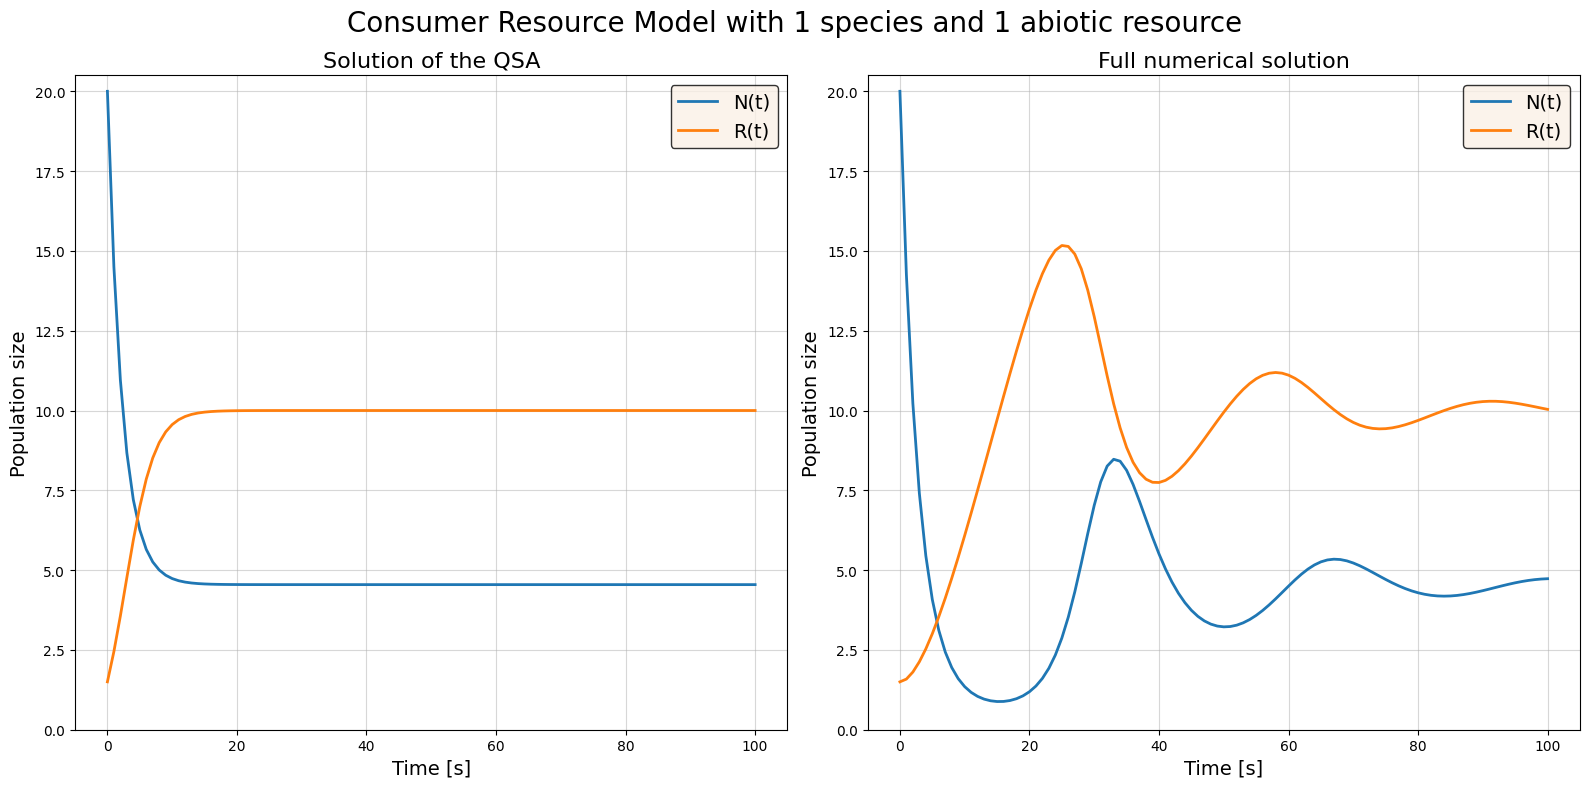

In [152]:
# plot the results
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Consumer Resource Model with 1 species and 1 abiotic resource', fontsize=20)

# QSA
ax0.plot(time_vec, y_approx[1], linewidth=2, label='N(t)')
ax0.plot(time_vec, y_approx[0], linewidth=2, label='R(t)')
ax0.set_xlabel('Time [s]', fontsize=14)
ax0.set_ylabel('Population size', fontsize=14)
ax0.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax0.grid(alpha=0.5)
ax0.set_ylim([0, 20.5])

ax0.set_title('Solution of the QSA', fontsize=16)

# full solution
ax1.plot(time_vec, y[:, 1], linewidth=2, label='N(t)')
ax1.plot(time_vec, y[:, 0], linewidth=2, label='R(t)')
ax1.set_xlabel('Time [s]', fontsize=14)
ax1.set_ylabel('Population size', fontsize=14)
ax1.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax1.grid(alpha=0.5)
ax1.set_ylim([0, 20.5])

ax1.set_title('Full numerical solution', fontsize=16)

plt.tight_layout()
plt.show()

Show QSA solution and the full solution in a single plot and compare them.

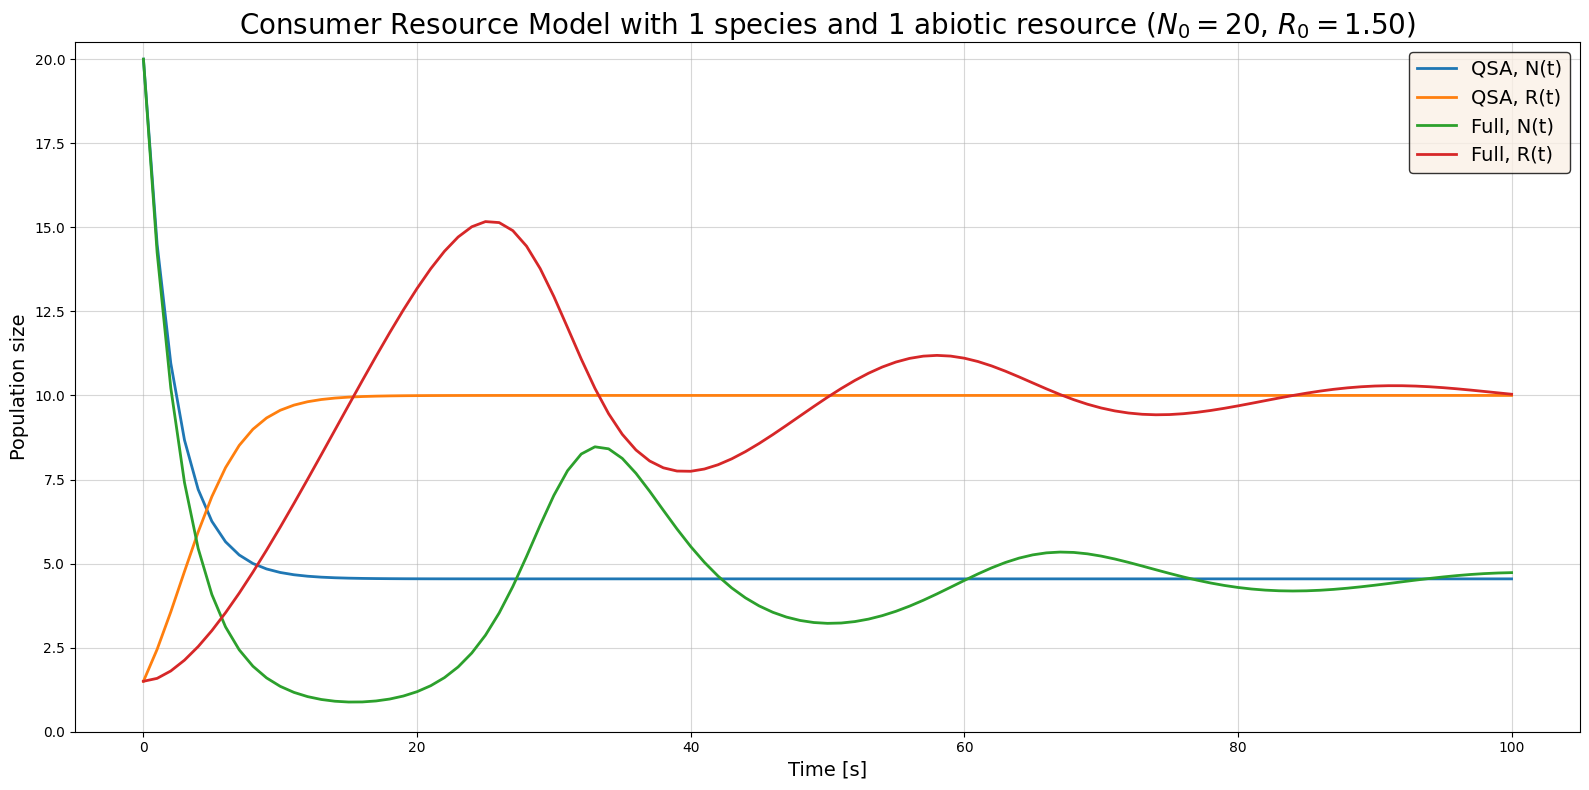

In [153]:
# plot the results
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.set_title('Consumer Resource Model with 1 species and 1 abiotic resource ($N_0=%i$, $R_0=%.2f$)' %(N0, R0), fontsize=20)

# QSA
ax.plot(time_vec, y_approx[1], linewidth=2, label='QSA, N(t)')
ax.plot(time_vec, y_approx[0], linewidth=2, label='QSA, R(t)')
ax.plot(time_vec, y[:, 1], linewidth=2, label='Full, N(t)')
ax.plot(time_vec, y[:, 0], linewidth=2, label='Full, R(t)')
ax.set_xlabel('Time [s]', fontsize=14)
ax.set_ylabel('Population size', fontsize=14)
ax.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax.grid(alpha=0.5)
ax.set_ylim([0, 20.5])

plt.tight_layout()
plt.show()

Now want to see what happened if we change the value of each parameter.

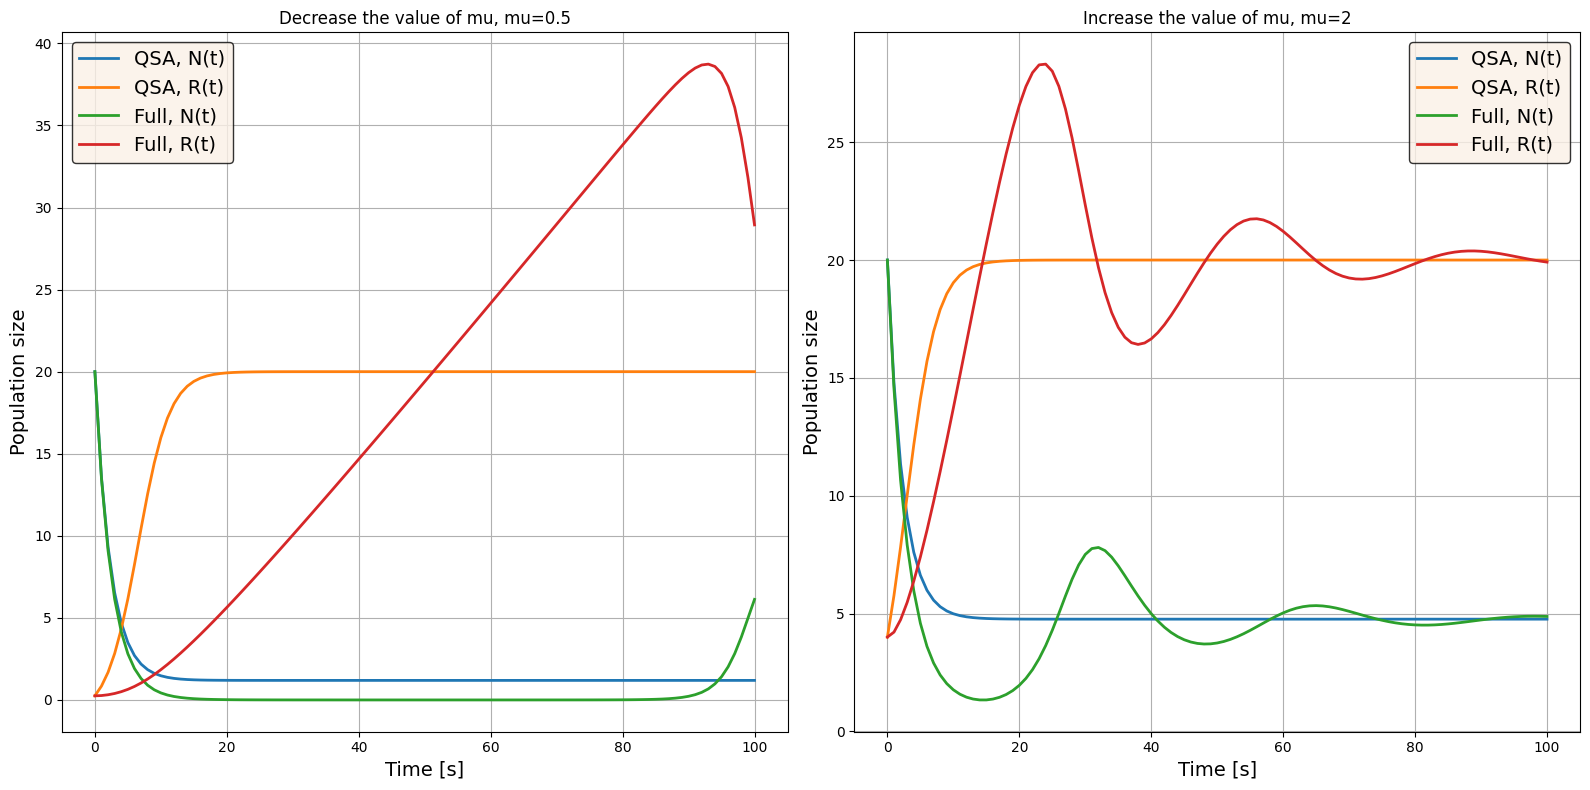

In [156]:
# change the value of mu
ks = 1
c = 0.02
d = 0.4
gamma = 1  
mu1 = 0.5 #decrease
mu2 = 2 #increase

# initialization
N0 = 20
R01 = (mu1-c*N0*ks)/(c*N0)
R02 = (mu2-c*N0*ks)/(c*N0)

# QSA 
y_approx1 = qsa_function(time_vec, gamma, mu1, c , d, ks)
y_approx2 = qsa_function(time_vec, gamma, mu2, c , d, ks)

# full solution: call the odeint() method
y1 = odeint(derivative, y0=[R01, N0], t=time_vec, args=(gamma, mu1, c , d, ks))
y2 = odeint(derivative, y0=[R02, N0], t=time_vec, args=(gamma, mu2, c , d, ks))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))


# QSA
ax1.plot(time_vec, y_approx1[1], linewidth=2, label='QSA, N(t)')
ax1.plot(time_vec, y_approx1[0], linewidth=2, label='QSA, R(t)')
ax1.plot(time_vec, y1[:, 1], linewidth=2, label='Full, N(t)')
ax1.plot(time_vec, y1[:, 0], linewidth=2, label='Full, R(t)')
ax1.set_xlabel('Time [s]', fontsize=14)
ax1.set_ylabel('Population size', fontsize=14)
ax1.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax1.set_title(f'Decrease the value of mu, mu={mu1}')
ax1.grid()


ax2.plot(time_vec, y_approx2[1], linewidth=2, label='QSA, N(t)')
ax2.plot(time_vec, y_approx2[0], linewidth=2, label='QSA, R(t)')
ax2.plot(time_vec, y2[:, 1], linewidth=2, label='Full, N(t)')
ax2.plot(time_vec, y2[:, 0], linewidth=2, label='Full, R(t)')
ax2.set_xlabel('Time [s]', fontsize=14)
ax2.set_ylabel('Population size', fontsize=14)
ax2.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax2.set_title(f'Increase the value of mu, mu={mu2}')
ax2.grid()


plt.tight_layout()
plt.show()

When the $\mu$ is decreased the population goes to extinction so the abundance of resources increase eventually, also we can say that the time that the system needs to become stable is. However, when the value of $\mu$ is increased we can see the flactuation between resources and population untile in become stable and this stability takes less time.

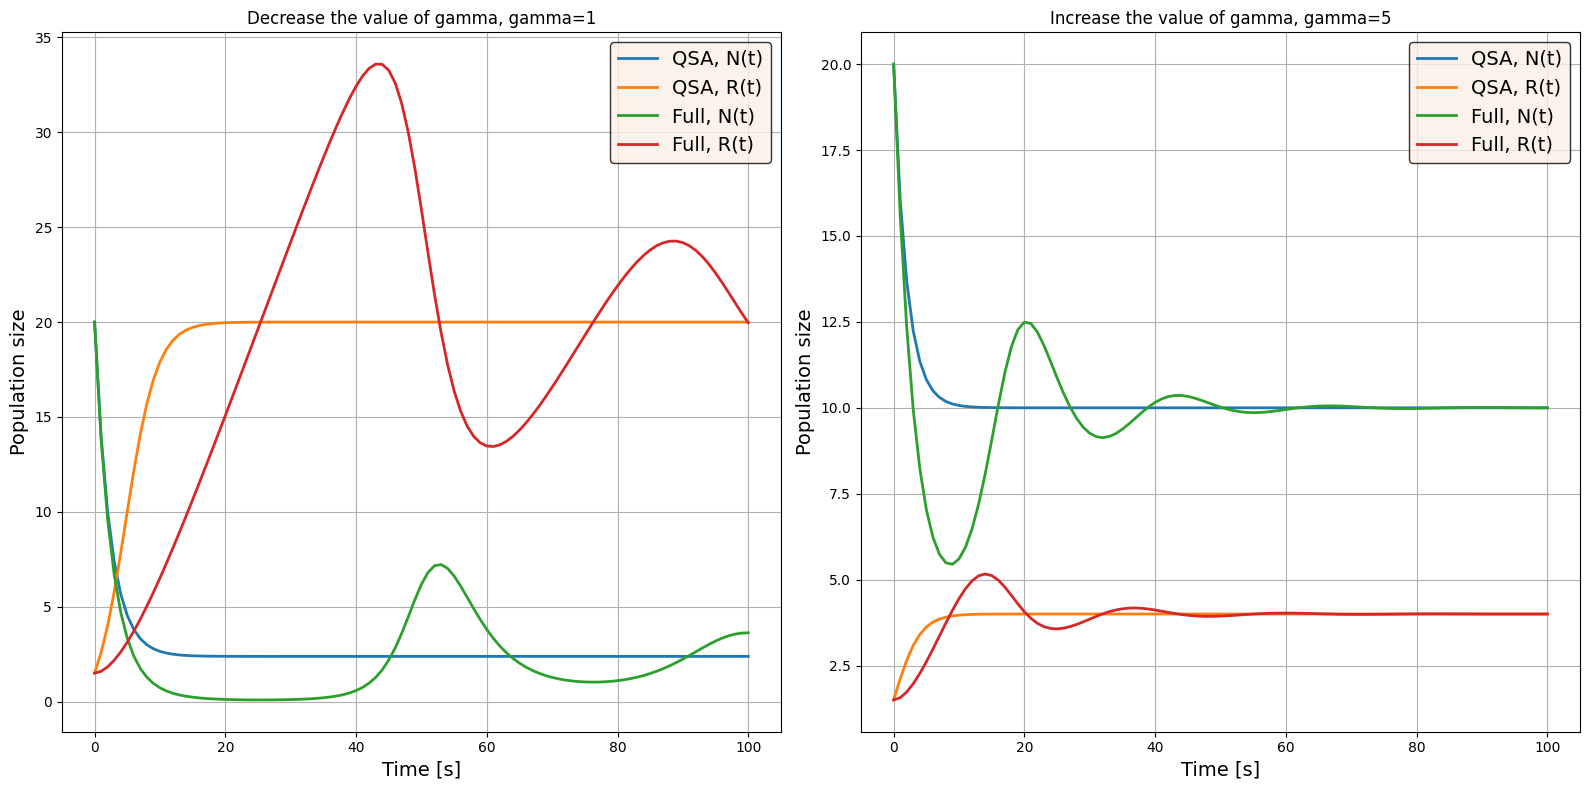

In [145]:
# change the value of gamma
ks = 1
c = 0.02
d = 0.4
gamma1 = 1  #decrease
gamma2= 5 #increase

# initialization
N0 = 20
R0 = (1-c*N0*ks)/(c*N0)

# QSA 
y_approx1 = qsa_function(time_vec, gamma1, c , d, ks)
y_approx2 = qsa_function(time_vec, gamma2, c , d, ks)

# full solution: call the odeint() method
y1 = odeint(derivative, y0=[R0, N0], t=time_vec, args=(gamma1, c , d, ks))
y2 = odeint(derivative, y0=[R0, N0], t=time_vec, args=(gamma2, c , d, ks))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax.set_title('Consumer Resource Model with 1 species and 1 abiotic resource ($N_0=%i$, $R_0=%.2f$)' %(N0, R0), fontsize=20)

# QSA
ax1.plot(time_vec, y_approx1[1], linewidth=2, label='QSA, N(t)')
ax1.plot(time_vec, y_approx1[0], linewidth=2, label='QSA, R(t)')
ax1.plot(time_vec, y1[:, 1], linewidth=2, label='Full, N(t)')
ax1.plot(time_vec, y1[:, 0], linewidth=2, label='Full, R(t)')
ax1.set_xlabel('Time [s]', fontsize=14)
ax1.set_ylabel('Population size', fontsize=14)
ax1.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax1.set_title(f'Decrease the value of gamma, gamma={gamma1}')
ax1.grid()


ax2.plot(time_vec, y_approx2[1], linewidth=2, label='QSA, N(t)')
ax2.plot(time_vec, y_approx2[0], linewidth=2, label='QSA, R(t)')
ax2.plot(time_vec, y2[:, 1], linewidth=2, label='Full, N(t)')
ax2.plot(time_vec, y2[:, 0], linewidth=2, label='Full, R(t)')
ax2.set_xlabel('Time [s]', fontsize=14)
ax2.set_ylabel('Population size', fontsize=14)
ax2.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax2.set_title(f'Increase the value of gamma, gamma={gamma2}')
ax2.grid()


plt.tight_layout()
plt.show()

As we can see when the value of $c$ was decreased, the time that needed to reach the stable phase is more than when the $c$ is increase. Moreover, when $c$ has a higher value, the asymptotical value of population $N$ is higher.

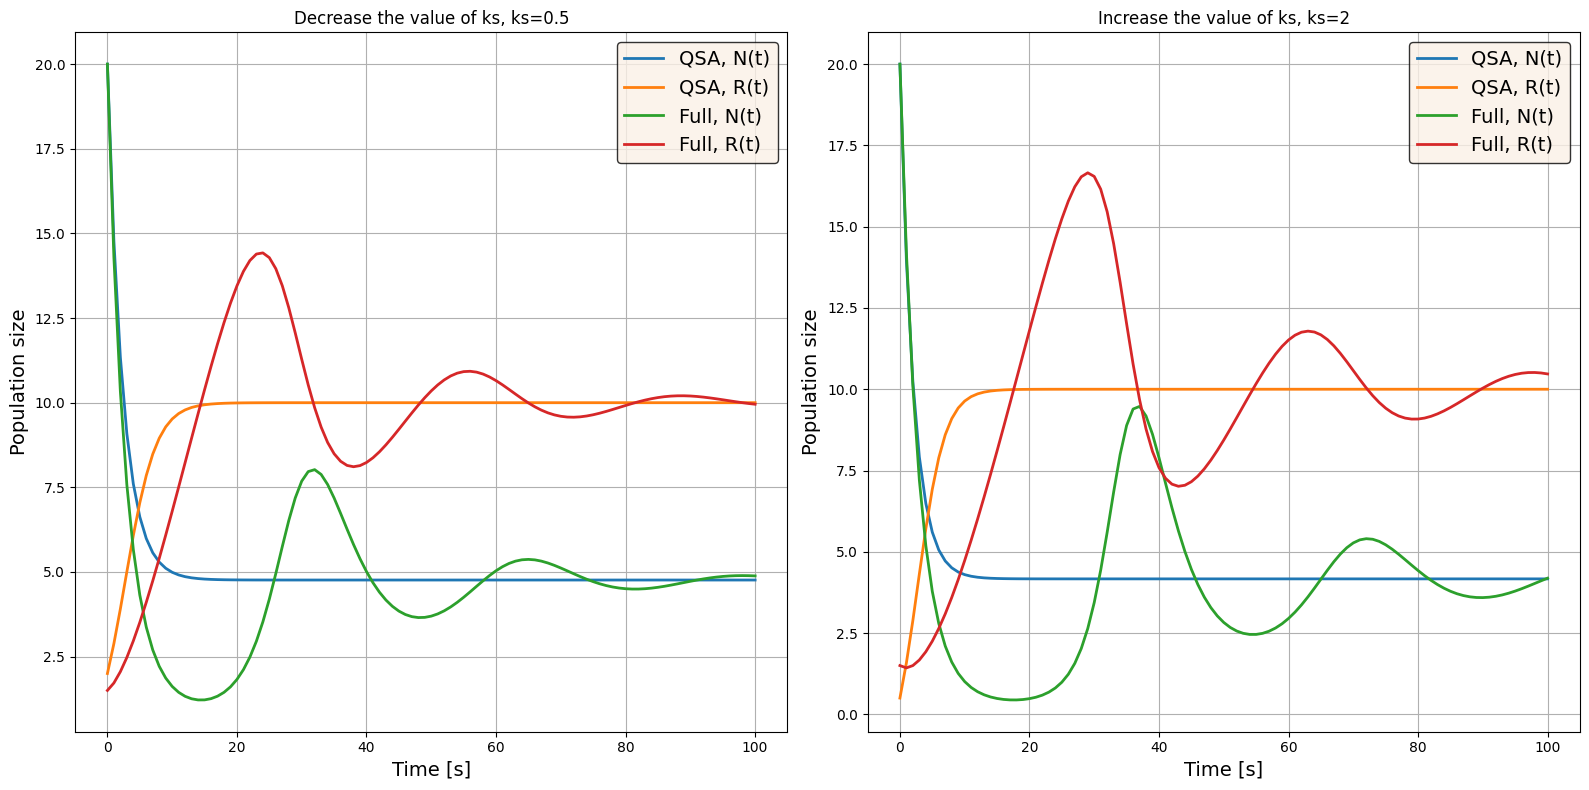

In [143]:
# change the value of ks
ks1 = 0.5   #decrease
ks2 = 2     #increase
c = 0.02
d = 0.4
gamma = 2

# initialization
N0 = 20
R0 = (1-c*N0*ks)/(c*N0)

# QSA 
y_approx1 = qsa_function(time_vec, gamma, c , d, ks1)
y_approx2 = qsa_function(time_vec, gamma, c , d, ks2)

# full solution: call the odeint() method
y1 = odeint(derivative, y0=[R0, N0], t=time_vec, args=(gamma, c , d, ks1))
y2 = odeint(derivative, y0=[R0, N0], t=time_vec, args=(gamma, c , d, ks2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax.set_title('Consumer Resource Model with 1 species and 1 abiotic resource ($N_0=%i$, $R_0=%.2f$)' %(N0, R0), fontsize=20)

# QSA
ax1.plot(time_vec, y_approx1[1], linewidth=2, label='QSA, N(t)')
ax1.plot(time_vec, y_approx1[0], linewidth=2, label='QSA, R(t)')
ax1.plot(time_vec, y1[:, 1], linewidth=2, label='Full, N(t)')
ax1.plot(time_vec, y1[:, 0], linewidth=2, label='Full, R(t)')
ax1.set_xlabel('Time [s]', fontsize=14)
ax1.set_ylabel('Population size', fontsize=14)
ax1.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax1.set_title(f'Decrease the value of ks, ks={ks1}')
ax1.grid()


ax2.plot(time_vec, y_approx2[1], linewidth=2, label='QSA, N(t)')
ax2.plot(time_vec, y_approx2[0], linewidth=2, label='QSA, R(t)')
ax2.plot(time_vec, y2[:, 1], linewidth=2, label='Full, N(t)')
ax2.plot(time_vec, y2[:, 0], linewidth=2, label='Full, R(t)')
ax2.set_xlabel('Time [s]', fontsize=14)
ax2.set_ylabel('Population size', fontsize=14)
ax2.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax2.set_title(f'Increase the value of ks, ks={ks2}')
ax2.grid()


plt.tight_layout()
plt.show()

We can see that changing the value of $k_s$ is not change the flactuations dramatically, also the asymptotic value of $R$ does not change.

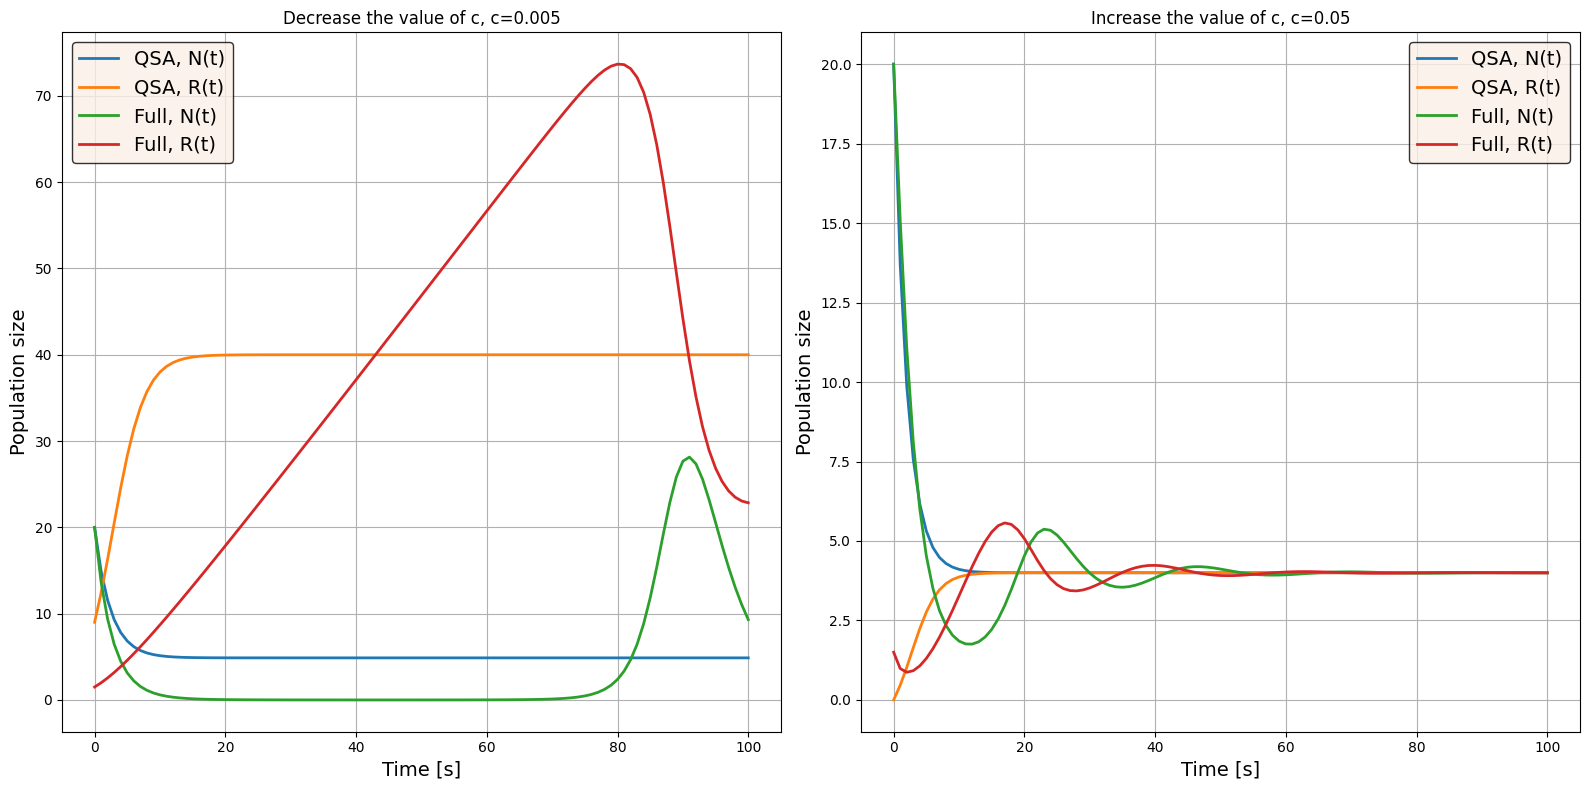

In [144]:
# change the value of c
ks = 1
c1 = 0.005    #decrease
c2 = 0.05     #increase
d = 0.4
gamma = 2

# initialization
N0 = 20
R0 = (1-c*N0*ks)/(c*N0)

# QSA 
y_approx1 = qsa_function(time_vec, gamma, c1 , d, ks)
y_approx2 = qsa_function(time_vec, gamma, c2 , d, ks)

# full solution: call the odeint() method
y1 = odeint(derivative, y0=[R0, N0], t=time_vec, args=(gamma, c1 , d, ks))
y2 = odeint(derivative, y0=[R0, N0], t=time_vec, args=(gamma, c2 , d, ks))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax.set_title('Consumer Resource Model with 1 species and 1 abiotic resource ($N_0=%i$, $R_0=%.2f$)' %(N0, R0), fontsize=20)

# QSA
ax1.plot(time_vec, y_approx1[1], linewidth=2, label='QSA, N(t)')
ax1.plot(time_vec, y_approx1[0], linewidth=2, label='QSA, R(t)')
ax1.plot(time_vec, y1[:, 1], linewidth=2, label='Full, N(t)')
ax1.plot(time_vec, y1[:, 0], linewidth=2, label='Full, R(t)')
ax1.set_xlabel('Time [s]', fontsize=14)
ax1.set_ylabel('Population size', fontsize=14)
ax1.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax1.set_title(f'Decrease the value of c, c={c1}')
ax1.grid()


ax2.plot(time_vec, y_approx2[1], linewidth=2, label='QSA, N(t)')
ax2.plot(time_vec, y_approx2[0], linewidth=2, label='QSA, R(t)')
ax2.plot(time_vec, y2[:, 1], linewidth=2, label='Full, N(t)')
ax2.plot(time_vec, y2[:, 0], linewidth=2, label='Full, R(t)')
ax2.set_xlabel('Time [s]', fontsize=14)
ax2.set_ylabel('Population size', fontsize=14)
ax2.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax2.set_title(f'Increase the value of c, c={c2}')
ax2.grid()


plt.tight_layout()
plt.show()

As the efficiency related to the consumption of the resource is higher, both the population and the resource reach a lower asymptotic value. While, we notice the opposite behaviour with an overall slower development of the dynamic.

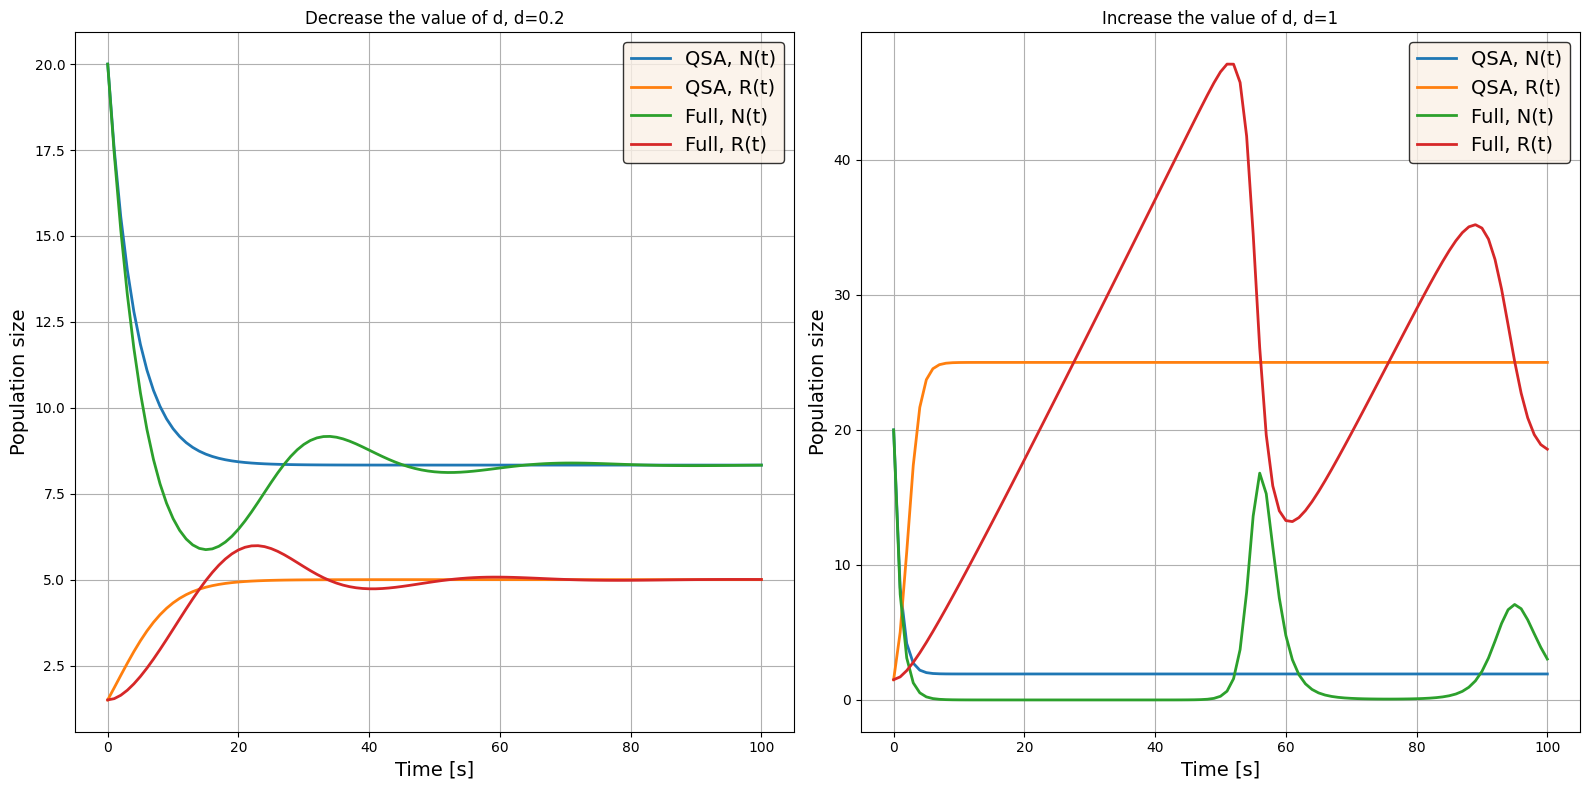

In [142]:
# change the value of d
ks = 1
c = 0.02
d1 = 0.2    #decrease
d2 = 1      #increase
gamma = 2

# initialization
N0 = 20
R0 = (1-c*N0*ks)/(c*N0)

# QSA 
y_approx1 = qsa_function(time_vec, gamma, c , d1, ks)
y_approx2 = qsa_function(time_vec, gamma, c , d2, ks)

# full solution: call the odeint() method
y1 = odeint(derivative, y0=[R0, N0], t=time_vec, args=(gamma, c , d1, ks))
y2 = odeint(derivative, y0=[R0, N0], t=time_vec, args=(gamma, c , d2, ks))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax.set_title('Consumer Resource Model with 1 species and 1 abiotic resource ($N_0=%i$, $R_0=%.2f$)' %(N0, R0), fontsize=20)

# QSA
ax1.plot(time_vec, y_approx1[1], linewidth=2, label='QSA, N(t)')
ax1.plot(time_vec, y_approx1[0], linewidth=2, label='QSA, R(t)')
ax1.plot(time_vec, y1[:, 1], linewidth=2, label='Full, N(t)')
ax1.plot(time_vec, y1[:, 0], linewidth=2, label='Full, R(t)')
ax1.set_xlabel('Time [s]', fontsize=14)
ax1.set_ylabel('Population size', fontsize=14)
ax1.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax1.set_title(f'Decrease the value of d, d={d1}')
ax1.grid()


ax2.plot(time_vec, y_approx2[1], linewidth=2, label='QSA, N(t)')
ax2.plot(time_vec, y_approx2[0], linewidth=2, label='QSA, R(t)')
ax2.plot(time_vec, y2[:, 1], linewidth=2, label='Full, N(t)')
ax2.plot(time_vec, y2[:, 0], linewidth=2, label='Full, R(t)')
ax2.set_xlabel('Time [s]', fontsize=14)
ax2.set_ylabel('Population size', fontsize=14)
ax2.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax2.set_title(f'Increase the value of d, d={d2}')
ax2.grid()


plt.tight_layout()
plt.show()

As we are expected, when the rate of death is higher after a while it seems that the population extinction also it takes more time to become stable.


<h1 style="font-size: 30px">Stochastic Logistic Growth with Environmental noise</h1>



<p style="text-align: justify; font-size: 15px">
In the following we treat the case of Stochastic Logistic Growth with Environmental noise. We write down the Stochastic Differential Equation (<b>SDE</b>), then we write the associated <i style="font-style: oblique 15deg">Fokker-Planck</i> equation and we solve for <stem style="font-family:DejaVu Sans; font-size: 18px">P<sup>*</sup>(x)</stem> finding the stationary solution.
</p>




$$
\begin{equation}\tag{1}
\dfrac{\mathcal{d}x_i}{\mathcal{d}t} \quad = \quad \dfrac{x_i}{\tau_i} \big( 1 - \dfrac{x_i}{K_i} \big) + \sqrt{\dfrac{\sigma_i}{\tau_i}}\cdot x_i \xi_i(t)
\end{equation}
$$

</br>

Recognizing the tipycal form $\quad \dot{x} = A(x) + \sqrt{B(x)} \cdot \xi{(t)} \quad$ we can write $A(x) = \dfrac{x}{\tau} \cdot \bigg(  1 - \dfrac{x}{k}  \bigg) \quad$ and $B(x) = \dfrac{\sigma}{\tau} x^2$
\
\
\
\
The associated *Fokker Planck* equation is then,


<br/>
<br/>

$$
\begin{equation}\tag{2}

\dfrac{\partial P(x)}{\partial t} \quad = \quad -\dfrac{\partial}{\partial x} \big[ A(x)P(x)   \big] + \dfrac{1}{2} \dfrac{\partial^2}{\partial x^2} \big[  B(x)P(x)  \big] \quad = \quad -\dfrac{\partial}{\partial x} \bigg[ \dfrac{x}{\tau} \big(   1 - \dfrac{x}{k}   \big)    P(x)   \bigg] + \dfrac{1}{2} \dfrac{\partial^2}{\partial x^2} \bigg[  \dfrac{\sigma}{\tau}x^2P(x)  \bigg]

\end{equation}
$$

<br/>

What we want to find is the stationary solution, obtianed by setting $\dfrac{\partial P(x)}{\partial t} = 0$. Therefore,

$$
\begin{equation}\tag{3}
0 \quad = \quad \dfrac{\partial}{\partial x}  \overbrace{\bigg(   \dfrac{x}{\tau} \cdot \bigg(  \dfrac{x}{k} - 1 \bigg)P(x) + \dfrac{1}{2} \dfrac{\partial}{\partial x}  \bigg(   \dfrac{\sigma}{\tau} x^2 P(x)  \bigg)}^{J(x)}
\end{equation}

$$

<br/>
<br/>

Knowing from above that $J(x)$ is a constant and setting in the initial condition we obtain,

<br/>

$$
%\begin{equation}\tag{4}
  \dfrac{x}{\tau} \cdot \bigg( 1 - \dfrac{x}{k}  \bigg)P(x) \quad = \quad \dfrac{1}{2} \dfrac{\sigma}{\tau} \bigg( 2xP(x) + x^2 \dfrac{\partial P}{ \partial x}  \bigg) \quad; \\[15pt]

  
  P(x) \bigg(  \dfrac{x}{\tau} \bigg( 1 -   \dfrac{x}{k}  \bigg) -  \dfrac{\sigma}{\tau} x \bigg) \quad = \quad \dfrac{1}{2} x^2 \cdot \dfrac{\sigma}{\tau} \dfrac{\partial P }{ \partial x}
%\end{equation}
\tag{4}
$$

<br/>
<br/>

Rearranging,

<br/>

$$
\begin{equation}\tag{5}
\dfrac{\mathcal{d} P}{P(x)} \quad = \quad \mathcal{d}x  \dfrac{2}{\sigma}\cdot  \big(  \dfrac{1 - \sigma}{x}  - \dfrac{1}{k} \big)
\end{equation}
$$

<br/>

And finally integrating,

$$
\begin{equation}\tag{6}
P(x) = 
\gamma \cdot exp \bigg\{  \dfrac{2}{\sigma} \cdot \bigg( \big(  1 - \sigma \big) \cdot ln x    -   \dfrac{x}{k}  \bigg)\bigg\}
\end{equation}
$$

<br/>

Where $\gamma$ is the integration constant, equal to,

<br/>

$$

\dfrac{1}{\gamma} = \int exp \bigg\{ \underbrace{   \dfrac{2}{\sigma} \cdot  \big(    1 - \sigma  \big)}_{\alpha}lnx  - \underbrace{\dfrac{1}{k}}_{\beta}  \cdot  x  \bigg\} \mathcal{d}x \quad =\\
$$

<br/>

$$

= \quad \int e^{ \alpha \cdot lnx } \cdot e^{ - \beta x }  \mathcal{d}x \quad 

$$

<br/>

$$

\quad = \int x^{\alpha} \cdot e^{- \beta x} \mathcal{d}x
\tag{7}

$$


<br/>

<p style="text-align: justify; font-size: 15px">

If $\alpha$ and $\beta$ would have been integers we could have solved the integral by partial integration and then, iterating long enough, we would get an integral of the form $\int e^{-\beta x} \mathcal{d}x$.

</p>


<p style="text-align: justify; font-size: 15px">

In the more general case of real coefficients $\big( \alpha, \beta \in \R  \big)$ we rely to the theorem of fundamental calculus,

</p>


$$


\dfrac{\mathcal{d}}{\mathcal{d} x}\bigg[    \int_{g(x)}^{\infty} h(t) \mathcal{d}t \bigg] \quad = \quad -h(g(x)) \cdot g'(x)
\tag{8}

$$

<br/>

<p style="text-align: justify; font-size: 15px">

Combined with the definition of the $\Gamma$ function,

<br/>

</p>


$$

\Gamma(a, x) = \int_x^{\infty}t^{a-1} \cdot e^{-t} \mathcal{d}t
\tag{9}
$$

<p style="text-align: justify; font-size: 15px">

Getting,

</p>

<br/>

$$

\dfrac{\mathcal{d}}{\mathcal{d}x} \Gamma(a + 1, bx) \quad = \quad \dfrac{\mathcal{d}}{\mathcal{d}x} \int_{bx}^{\infty}t^a \cdot e^{-t} \quad = \quad -\big(    bx   \big)^a e^{- bx} \cdot b \quad = \quad -b^{a + 1}x^a e^{-bx}

$$


<p style="text-align: justify; font-size: 15px">

In our specific case,

</p>

<br/>

$$

\int x^{\alpha} \cdot e^{- \beta x} \mathcal{d}x \quad 

$$
 we multiply and divide by $ \beta^{\alpha + 1}$
$$

 \quad \int \beta^{\alpha + 1}x^{\alpha}e^{-\beta x} \beta^{-\alpha - 1} \quad = \quad -\beta^{-\alpha-1} \int \bigg[   \dfrac{\mathcal{d}}{\mathcal{d}x} \Gamma \big(   \alpha + 1  , \beta x \big)  \bigg] \mathcal{d}x \quad = \quad - \beta^{-\alpha-1} \Gamma(\alpha + 1, \beta x)

$$

<h2 style="font-size: 25px;">Simulation of the SDA</h2>

Here below we simulate the SDE in the limit where $\sigma = 0$ so the stochastic part will not be taken into account.<br>
This case can be solved analytical and, as $t \rightarrow \infty$ $x$ saturates to $k$. The simulation, if done correctly should reflect that.

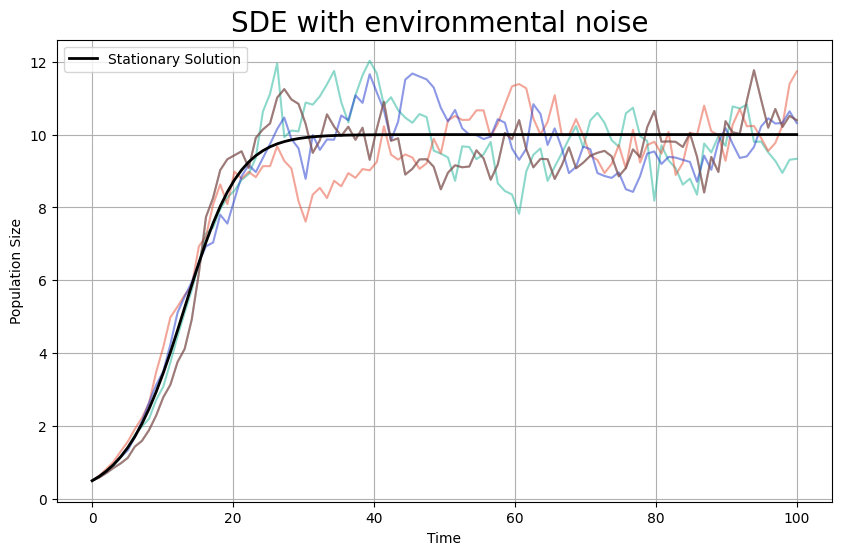

In [160]:

def SDE(x0, T, dt, tau, k, sigma):

    # SDE with environmental noise
    num_steps = int(T/dt)
    t= np.linspace(0, T, num_steps)
    x = np.zeros(num_steps)
    x[0]=x0
    for i in range(1,num_steps):
        sai = np.random.normal(0,np.sqrt(dt))
        dx = (x[i-1]/tau)*(1 - x[i-1]/k) + np.sqrt(sigma/tau) * x[i-1] * sai
        # print(dx)
        x[i] = x[i-1] +dx

    return t, x


# Parameters
x0= 0.5
tau = 4
k = 10
sigma = 0.01
T = 100  
dt = 1

# Simulate the stochastic logistic model
t, x1 = SDE(x0, T , dt , tau, k, sigma=0.01)
t, x2 = SDE(x0, T , dt , tau, k, sigma=0.01)
t, x3 = SDE(x0, T , dt , tau, k, sigma=0.01)
t, x4 = SDE(x0, T , dt , tau, k, sigma=0.01)
t, x5 = SDE(x0, T , dt , tau, k, sigma=0.01)

# Calculate the stationary solution
t_sta ,x_sta = SDE(x0, T , dt , tau, k, sigma=0)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(t, x1,  color=(0.1 , 0.7 , 0.6, 0.5))
plt.plot(t, x2,  color=(0.9, 0.3, 0.2, 0.5))
plt.plot(t, x3,  color=(0.1, 0.2, 0.8, 0.5))
plt.plot(t, x4, color=(0.1, 0.5, 0.3, 0.5))
plt.plot(t, x4, color=(0.7, 0.2, 0.3, 0.5))
plt.plot(t_sta, x_sta, label='Stationary Solution', color='black', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('SDE with environmental noise ', fontsize = 20)
plt.grid()
plt.legend(loc='best')
plt.show()
